# importing libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# data preprocessing

In [5]:
movies = movies.merge(credits, on="title")

In [6]:
movies.shape

(4809, 23)

In [7]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [8]:
# genre
# id
# keywords
# title
# overview
# cast
# crew

movies = movies[["movie_id","title","overview","genres","keywords","cast","crew"]]

In [9]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [11]:
movies.dropna(inplace=True)

In [12]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [13]:
movies.duplicated().sum()

0

In [14]:
movies.iloc[0].genres       # this lst is a collection of dictionanry in a list and it is a list 

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [15]:
# convert the genres dictionary to list we will create a helper function 
import ast
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i["name"])
    return L
        
    


In [16]:
convert('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [17]:
movies["genres"] = movies["genres"].apply(convert)

In [18]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


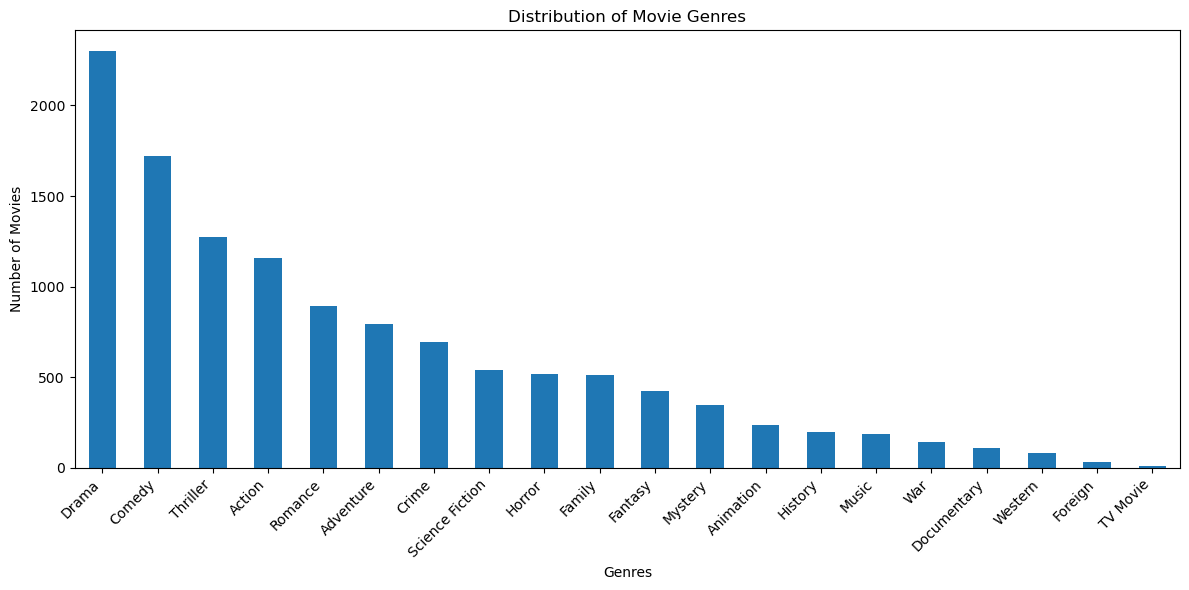

In [19]:
import matplotlib.pyplot as plt

# Flatten the genres list
all_genres = [genre for genres in movies['genres'] for genre in genres]

# Count the occurrences of each genre
genre_counts = pd.Series(all_genres).value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
movies["keywords"] = movies["keywords"].apply(convert)

In [21]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [22]:
movies["cast"][0]   # we need details of 3 cast members meaning first 3 dictionary

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [23]:
def convert3(obj):
    L = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3:
            L.append(i["name"])
            counter+=1
        else:
            break
    return L

In [24]:
movies["cast"] = movies["cast"].apply(convert3)

In [25]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


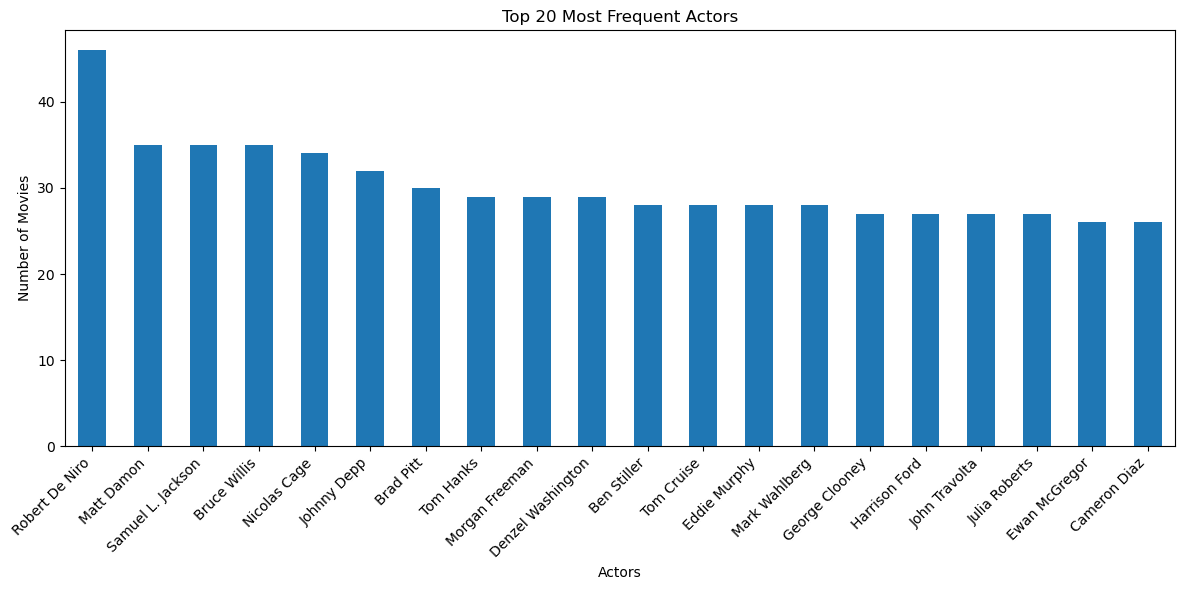

In [26]:
# 2. Cast Distribution (Top 20 most frequent actors)
plt.figure(figsize=(12, 6))
all_cast = [actor for actors in movies['cast'] for actor in actors]
cast_counts = pd.Series(all_cast).value_counts()[:20]
cast_counts.plot(kind='bar')
plt.title('Top 20 Most Frequent Actors')
plt.xlabel('Actors')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
movies["crew"][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [28]:
def fetch_director(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i["job"] == "Director" :
            L.append(i["name"])
            break
    return L

In [29]:
movies["crew"] = movies["crew"].apply(fetch_director)

In [30]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [31]:
movies["overview"][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [32]:
movies["overview"] = movies["overview"].apply(lambda x:x.split())

In [33]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


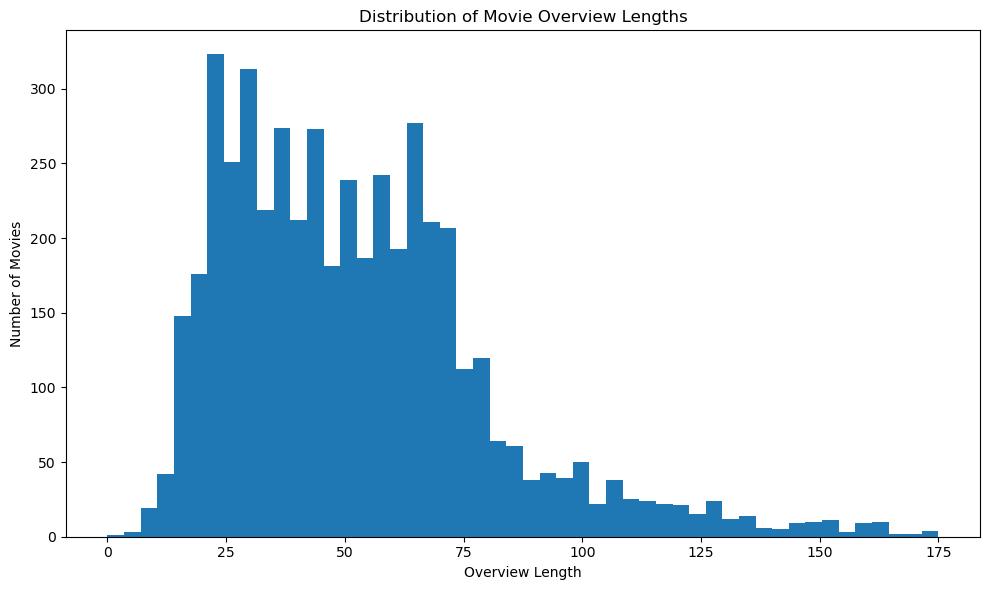

In [34]:
# 3. Movie Overview Length Distribution
plt.figure(figsize=(10, 6))
overview_lengths = movies['overview'].apply(len)
plt.hist(overview_lengths, bins=50)
plt.title('Distribution of Movie Overview Lengths')
plt.xlabel('Overview Length')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

In [35]:
# now we need to tackle the spaces bwtween name to resolve same first or last name issue which can lead to ambiguity
movies["genres"] = movies["genres"].apply(lambda x:[i.replace(" ","") for i in x])
movies["keywords"] = movies["keywords"].apply(lambda x:[i.replace(" ","") for i in x])
movies["cast"] = movies["cast"].apply(lambda x:[i.replace(" ","") for i in x])
movies["crew"] = movies["crew"].apply(lambda x:[i.replace(" ","") for i in x])

In [36]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [37]:
#now concantenating the columns
movies["tags"] = movies["overview"] + movies["genres"] + movies["keywords"] + movies["cast"] + movies["crew"]

In [38]:
movies.head()

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [39]:
new_df = movies[["movie_id","title","tags"]] 

In [40]:
new_df

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [41]:
#converting list of tags into string
new_df["tags"] = new_df["tags"].apply(lambda x:" ".join(x)) 

C:\Users\PRATHAM\AppData\Local\Temp\ipykernel_7612\668920232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["tags"] = new_df["tags"].apply(lambda x:" ".join(x))


In [42]:
new_df["tags"][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [43]:
new_df["tags"] = new_df["tags"].apply(lambda x:x.lower())

C:\Users\PRATHAM\AppData\Local\Temp\ipykernel_7612\3481706753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["tags"] = new_df["tags"].apply(lambda x:x.lower())


In [44]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


# text vectorization

In [45]:
!pip install nltk

In [46]:
# natural language proessing library
import nltk 

In [48]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [49]:
def stem(text):
    y = []
    
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

In [50]:
new_df["tags"] = new_df["tags"].apply(stem)

C:\Users\PRATHAM\AppData\Local\Temp\ipykernel_7612\825579503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["tags"] = new_df["tags"].apply(stem)


In [51]:
# now doing vectorization for similar words 
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words="english")

In [52]:
vectors = cv.fit_transform(new_df["tags"]).toarray() 

In [53]:
# due to zeros by deafault it give scipy sparse metrics hence we converted it into array
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
vectors.shape

(4806, 5000)

In [55]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
cv.get_feature_names_out()

array(['000', '007', '10', ..., 'zone', 'zoo', 'zooeydeschanel'],
      dtype=object)

In [57]:
cv.get_feature_names_out().tolist()

['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17th',
 '18',
 '18th',
 '18thcenturi',
 '19',
 '1910',
 '1920',
 '1930',
 '1940',
 '1944',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1970',
 '1970s',
 '1971',
 '1974',
 '1976',
 '1980',
 '1985',
 '1990',
 '1999',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2003',
 '2009',
 '20th',
 '21st',
 '23',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '70',
 '80',
 'aaron',
 'aaroneckhart',
 'abandon',
 'abduct',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'act',
 'action',
 'actionhero',
 'activ',
 'activist',
 'activities',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adamsandl',
 'adamshankman',
 'adapt',
 'add',
 'addict',
 'adjust',
 'admir',
 'admit',
 'adolesc',
 'adopt',
 'ador',
 'adrienbrodi',
 'adult'

In [58]:
# now we do steming for similar words like love,loving,loved
ps.stem("dance")

'danc'

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

In [60]:
similarity = cosine_similarity(vectors)

In [61]:
similarity[0]

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [62]:
# noe here is a problem in sorting that is when we sort we loose the index position 
sorted(similarity[0],reverse=True)

[1.0000000000000002,
 0.28676966733820225,
 0.26901379342448517,
 0.2605130246476754,
 0.255608593705383,
 0.25038669783359574,
 0.24511108480187255,
 0.24455799402225922,
 0.2367785320221084,
 0.23179316248638276,
 0.23174488732966075,
 0.2278389747471728,
 0.2252817784447915,
 0.21853668936906193,
 0.21239769762143662,
 0.2108663315950723,
 0.2105263157894737,
 0.20443988269091456,
 0.20437977982832192,
 0.20395079136182276,
 0.2029530274475215,
 0.2029530274475215,
 0.20277677641345318,
 0.2024645717996314,
 0.2020475485519274,
 0.1979082783981174,
 0.19767387315371682,
 0.1976738731537168,
 0.19672236884115843,
 0.19252140716412977,
 0.19134594929397597,
 0.19088542889273336,
 0.19088542889273336,
 0.19007487139298027,
 0.1892994097121204,
 0.18731716231633883,
 0.1873171623163388,
 0.18693292157876878,
 0.1860807318911967,
 0.18394180184548975,
 0.18394180184548975,
 0.1813690625275029,
 0.18074256993863339,
 0.17996850826633903,
 0.17954621161490197,
 0.1777046633277277,
 0.17734

In [63]:
# and to tackle this sorting problem we call enumeraete fuction
list(enumerate(similarity[0]))

[(0, 1.0000000000000002),
 (1, 0.08346223261119858),
 (2, 0.08603090020146065),
 (3, 0.0734718358370645),
 (4, 0.1892994097121204),
 (5, 0.10838874619051501),
 (6, 0.04024218182927669),
 (7, 0.14673479641335554),
 (8, 0.05923488777590923),
 (9, 0.0967301666813349),
 (10, 0.10259783520851541),
 (11, 0.09464970485606021),
 (12, 0.09037128496931669),
 (13, 0.04499212706658476),
 (14, 0.12824729401064427),
 (15, 0.06282808624375433),
 (16, 0.07894736842105264),
 (17, 0.13977653617040256),
 (18, 0.09493290614465533),
 (19, 0.0830812984794528),
 (20, 0.058038100008800934),
 (21, 0.10968169942141635),
 (22, 0.0662266178532522),
 (23, 0.08740748201220976),
 (24, 0.0533380747062665),
 (25, 0.05101627678885769),
 (26, 0.15389675281277312),
 (27, 0.18693292157876878),
 (28, 0.116543309349613),
 (29, 0.065033247714309),
 (30, 0.06684847767323797),
 (31, 0.15907119074394446),
 (32, 0.08520286456846099),
 (33, 0.09733285267845754),
 (34, 0.0),
 (35, 0.09933992677987831),
 (36, 0.17316974359835272),


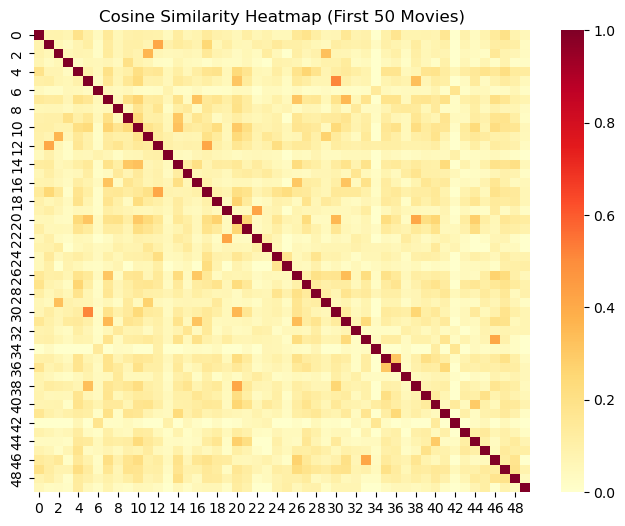

In [64]:
plt.figure(figsize=(8, 6))
sns.heatmap(similarity[:50, :50], cmap='YlOrRd')
plt.title('Cosine Similarity Heatmap (First 50 Movies)')
plt.show()

In [65]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(1216, 0.28676966733820225),
 (2409, 0.26901379342448517),
 (3730, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574)]

In [66]:
#fetching the index

new_df[new_df["title"] == "Avatar"].index[0]

0

In [67]:
new_df[new_df["title"] == "Batman Begins"].index[0]

119

In [68]:
def recommend(movie):
    movie_index = new_df[new_df["title"] == movie].index[0]
    distances = similarity[movie_index]
    movies_list =sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in movies_list:
        print(new_df.iloc[i[0]].title)

In [69]:
recommend("Pirates of the Caribbean: At World's End")

Pirates of the Caribbean: Dead Man's Chest
Pirates of the Caribbean: The Curse of the Black Pearl
Pirates of the Caribbean: On Stranger Tides
Life of Pi
20,000 Leagues Under the Sea


In [ ]:
new_df.iloc[1216].title

In [ ]:
def visualize_similar_movies(movie_title, n=10):
    movie_index = new_df[new_df["title"] == movie_title].index[0]
    distances = similarity[movie_index]
    similar_movies = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:n+1]
    
    titles = [new_df.iloc[i[0]].title for i in similar_movies]
    similarity_scores = [i[1] for i in similar_movies]
    
    plt.figure(figsize=(12, 6))
    plt.barh(titles, similarity_scores)
    plt.title(f'Top {n} Movies Similar to "{movie_title}"')
    plt.xlabel('Cosine Similarity Score')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Example usage:
visualize_similar_movies("Avatar")

In [ ]:
import pickle

In [ ]:
pickle.dump(new_df,open("movies.pkl","wb"))

In [ ]:
pickle.dump(new_df.to_dict(),open("movie_dict.pkl","wb"))

In [ ]:
pickle.dump(similarity,open("similarity.pkl","wb"))

In [ ]:
def recommend_by_genre(genre, num_recommendations=5):
    # Convert genre to lowercase for case-insensitive matching
    genre = genre.lower()
    
    # Filter movies that have the given genre
    movies_with_genre = movies[movies['genres'].apply(lambda x: genre in [g.lower() for g in x])]
    
    if movies_with_genre.empty:
        print(f"No movies found with the genre '{genre}'.")
        return
    
    # Calculate genre similarity for all movies
    similarity_scores = {}
    for idx, row in movies.iterrows():
        movie_genres = set([g.lower() for g in row['genres']])
        # Calculate Jaccard similarity
        similarity = int(genre in movie_genres)  # 1 if genre is present, 0 otherwise
        
        # Add keyword similarity for more nuanced recommendations
        keyword_set = set([k.lower() for k in row['keywords']])
        keyword_similarity = len(keyword_set.intersection(movies_with_genre['keywords'].explode().str.lower().unique())) / len(keyword_set) if keyword_set else 0
        
        # Combine genre and keyword similarity (70% genre, 30% keywords)
        total_similarity = (0.7 * similarity) + (0.3 * keyword_similarity)
        
        similarity_scores[row['title']] = (total_similarity, similarity, keyword_similarity)
    
    # Get top recommendations
    recommendations = dict(sorted(similarity_scores.items(), key=lambda x: x[1][0], reverse=True)[:num_recommendations])
    
    # Print recommendations
    print(f"\nTop {num_recommendations} movie recommendations for genre '{genre}':")
    print("=" * 70)
    
    # Prepare data for visualization
    titles = []
    genre_scores = []
    keyword_scores = []
    
    # Print detailed results
    for title, (total, genre_sim, keyword_sim) in recommendations.items():
        titles.append(title)
        genre_scores.append(genre_sim)
        keyword_scores.append(keyword_sim)
        print(f"Movie: {title}")
        print(f"Total Similarity Score: {total:.2f}")
        print(f"Genre Match: {'Yes' if genre_sim == 1 else 'No'}")
        print(f"Keyword Similarity: {keyword_sim:.2f}")
        print("-" * 70)
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    width = 0.35
    
    plt.barh(titles, genre_scores, width, label='Genre Match')
    plt.barh(titles, keyword_scores, width, left=genre_scores, label='Keyword Similarity')
    
    plt.title(f'Movie Recommendations for Genre "{genre}"')
    plt.xlabel('Similarity Score')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage
recommend_by_genre("Science Fiction") 

In [ ]:
recommend_by_genre("Action")

In [ ]:
recommend_by_genre("Comedy")

In [ ]:
recommend_by_genre("Drama")